17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 25s 1us/step


E:\anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 108s 629ms/step - accuracy: 0.6838 - loss: 0.5578 - val_accuracy: 0.8282 - val_loss: 0.3780
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 143s 635ms/step - accuracy: 0.8857 - loss: 0.2906 - val_accuracy: 0.8694 - val_loss: 0.3159
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 146s 657ms/step - accuracy: 0.9243 - loss: 0.2070 - val_accuracy: 0.8684 - val_loss: 0.3270
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 136s 616ms/step - accuracy: 0.9470 - loss: 0.1549 - val_accuracy: 0.8486 - val_loss: 0.3819
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 142s 616ms/step - accuracy: 0.9659 - loss: 0.1020 - val_accuracy: 0.8676 - val_loss: 0.4424


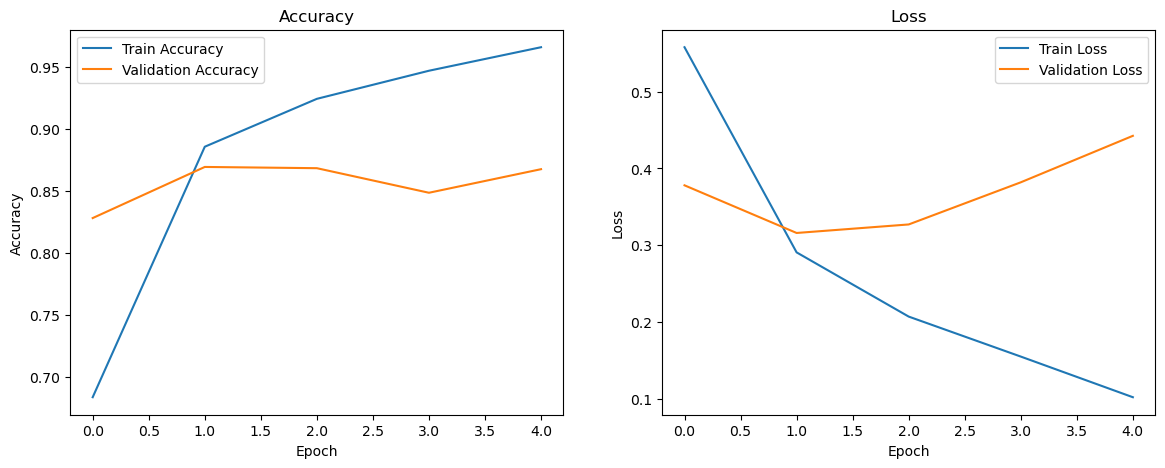

782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.8564 - loss: 0.4818  
Test Accuracy: 0.8564000129699707
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step
Prediction: Positive Review 😊


In [1]:
 # STEP 1 — Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# STEP 2 — Load Dataset
num_words = 10000  # top 10k most frequent words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# STEP 3 — Preprocess (Padding)
max_len = 200  # each review max length = 200

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# STEP 4 — Build Bidirectional LSTM Model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=max_len),

    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.4),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# STEP 5 — Train the Model
history = model.fit(x_train, y_train,epochs=5,batch_size=128,validation_split=0.2)

# STEP 6 — Matplotlib Visualization (Accuracy & Loss Graphs)
plt.figure(figsize=(14,5))

# Accuracy graph
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss graph
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# STEP 7 — Evaluate on Test Set
loss, acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", acc)

# STEP 8 — Predict Your Own Movie Review
word_index = imdb.get_word_index()

def encode_review(text):
    tokens = [word_index.get(word.lower(), 2) for word in text.split()]
    return pad_sequences([tokens], maxlen=max_len)

review = "The movie was extremely wonderful and emotional"
encoded = encode_review(review)

prediction = model.predict(encoded)[0][0]

if prediction > 0.5:
    print("Prediction: Positive Review 😊")
else:
    print("Prediction: Negative Review 😔")